# Time Series Regression and Exploratory Data Analysis

In [1]:
# Load packages
using DataFrames
using Distributions
using GLM
using LinearAlgebra
using Loess
using MLLabelUtils
using PyPlot
using RData
using StatsBase
using Statistics
using TimeSeries

matplotlib.rcParams["text.usetex"] = true;

## Exercise 2.1

In [2]:
# Load data
JJ = load("../data/JJ.rda");

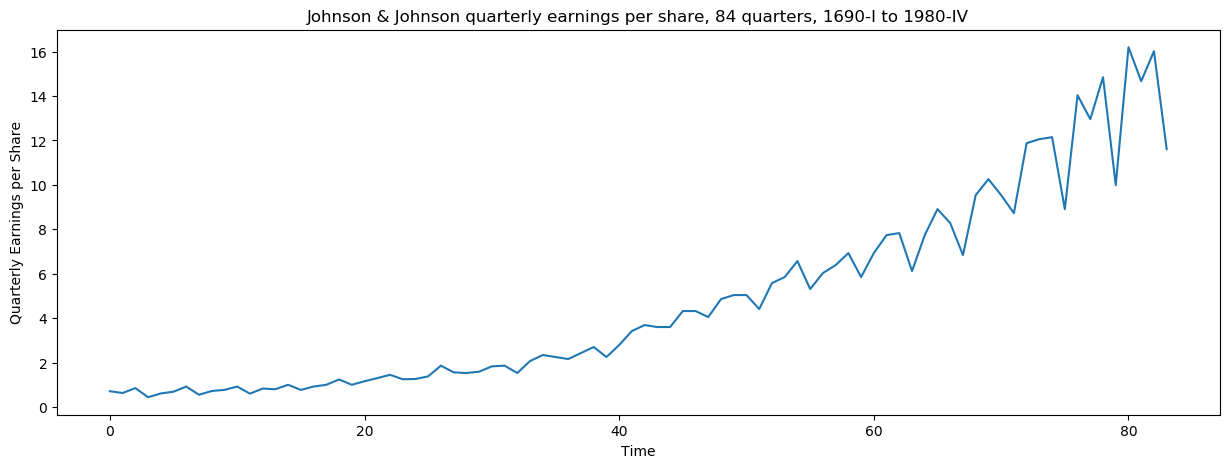

In [3]:
# Plot the data
figure(figsize=(15, 5))
plot(JJ["jj"])
xlabel("Time")
ylabel("Quarterly Earnings per Share")
title("Johnson & Johnson quarterly earnings per share, 84 quarters, 1690-I to 1980-IV")
show()

* *Question (a)*

Let's fit the regression model
$$x_t = \beta t + \alpha_1Q_1(t) + \alpha_2Q_2(t) + \alpha_3Q_3(t) + \alpha_4Q_4(t) + w_t,$$
where $Q_i(t) = 1$ if time $t$ corresponds to quarter $i = 1, 2, 3, 4$ and zero otherwise.

In [4]:
# Data formatting
time = -10.00:0.25:10.75
Q = repeat([1, 2, 3, 4], outer=[21])
Q_encoding = DataFrame(transpose(convertlabel(LabelEnc.OneOfK, Q)))
data = hcat(DataFrame(Y=[log(x) for x in JJ["jj"]], T=time), Q_encoding);

In [5]:
# Linear model
lm_model = lm(@formula(Y ~ 0 + T + x1 + x2 + x3 + x4), data);

In [6]:
lm_model

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Y ~ 0 + T + x1 + x2 + x3 + x4

Coefficients:
───────────────────────────────────────────────────────────────
       Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────
T   0.167172  0.00225911  74.00    <1e-74   0.162676   0.171669
x1  1.05279   0.0273592   38.48    <1e-52   0.998336   1.10725
x2  1.08092   0.027365    39.50    <1e-53   1.02645    1.13538
x3  1.15102   0.0273825   42.03    <1e-55   1.09652    1.20553
x4  0.882266  0.0274116   32.19    <1e-46   0.827705   0.936828
───────────────────────────────────────────────────────────────

* Question (b)

Assuming the model is correct, the estimated average quarters increase in the logged earnings per share is $0.17$. Thus, the estimated average annual increase is $0.67$.

* Question (c)

Assuming the model is correct, the average logged earnings rate increase from year to year in both the third and fourth quarters. It means that for two consecutive years, the earnings rate in the third quarter of the second year will be higher than in the first year and similarly for the fourth quarter. However, for a given year, the average logged earnings rate decrease from the third to the fourth quarter. In average, during the third quarter the logged earnings rate increases by $15\%$, while it decreases by $18\%$ during the fourth quarter. (Not sure on this)

* Question (d)

In [7]:
# Linear model with intercept
lm_model_with_int = lm(@formula(Y ~ T + x1 + x2 + x3 + x4), data);

In [8]:
lm_model_with_int

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Y ~ 1 + T + x1 + x2 + x3 + x4

Coefficients:
─────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      t  Pr(>|t|)   Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────
(Intercept)  0.444766  1.49687e6    0.00    1.0000  -2.98004e6  2.98004e6
T            0.167172  0.00227355  73.53    <1e-73   0.162646   0.171698
x1           0.608027  1.49687e6    0.00    1.0000  -2.98004e6  2.98004e6
x2           0.636149  1.49687e6    0.00    1.0000  -2.98004e6  2.98004e6
x3           0.706258  1.49687e6    0.00    1.0000  -2.98004e6  2.98004e6
x4           0.4375    1.49687e6    0.00    1.0000  -2.98004e6  2.98004e6
─────────────────────────────────────────────────────────────────────────

When an intercept is include is the model, the quarters variables are not significant anymore (but the trend coefficient is the same). The intercept hides the periodic effect express by the quarters. Without the intercept, one fit one linear model for each quarter.

* Question (e)

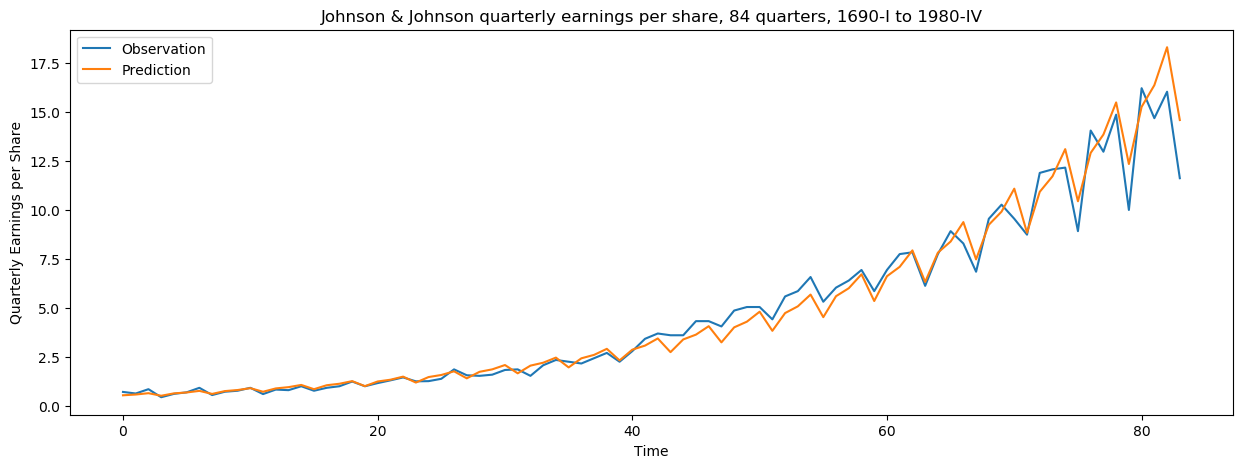

In [10]:
# Plot the data
figure(figsize=(15, 5))
plot(JJ["jj"], label="Observation")
plot([exp(x) for x in StatsBase.predict(lm_model)], label="Prediction")
xlabel("Time")
ylabel("Quarterly Earnings per Share")
legend()
title("Johnson & Johnson quarterly earnings per share, 84 quarters, 1690-I to 1980-IV")
show()

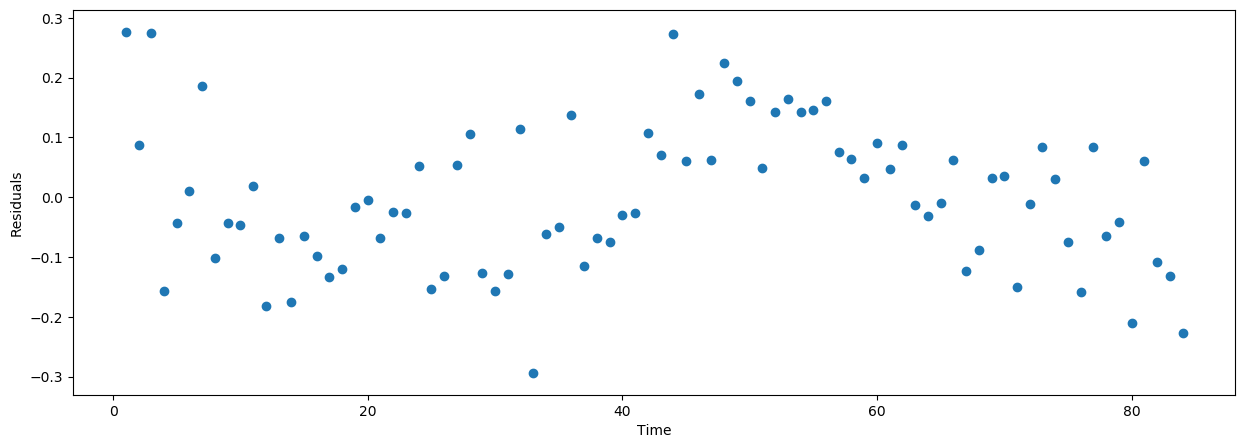

In [12]:
# Plot the data
figure(figsize=(15, 5))
scatter(1:84, data[!, "Y"] - StatsBase.predict(lm_model))
xlabel("Time")
ylabel("Residuals")
show()

The model fits quite well the data. The residuals do not look exactly white, we still see some pattern in the previous graph. However, the approximation is correct.

## Exercise 2.2

In [11]:
# Load data
mort = load("../data/cmort.rda")["cmort"];
temp = load("../data/tempr.rda")["tempr"];
part = load("../data/part.rda")["part"];

* Question (a)

In [12]:
# Build the model matrix
time = LinRange(1970.0, 1979.7692308, 508)[5:end];
temp1 = [i - mean(temp) for i in temp][5:end];
temp2 = [(i - mean(temp))^2 for i in temp][5:end];
part1 = part[5:end];
part4 = part[1:(end - 4)];
data = DataFrame(M=mort[5:end], T=time, temp1=temp1, temp2=temp2, part1=part1, part4=part4);

In [13]:
# Linear model with intercept
lm_model = lm(@formula(M ~ T + temp1 + temp2 + part1 + part4), data);

In [14]:
lm_model

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

M ~ 1 + T + temp1 + temp2 + part1 + part4

Coefficients:
─────────────────────────────────────────────────────────────────────────────────────
                    Coef.    Std. Error       t  Pr(>|t|)     Lower 95%     Upper 95%
─────────────────────────────────────────────────────────────────────────────────────
(Intercept)  2802.96       198.462        14.12    <1e-37  2413.03       3192.88
T              -1.38261      0.100445    -13.76    <1e-36    -1.57996      -1.18526
temp1          -0.405808     0.0352788   -11.50    <1e-26    -0.475121     -0.336494
temp2           0.0215466    0.00280251    7.69    <1e-13     0.0160404     0.0270528
part1           0.202882     0.0226577     8.95    <1e-17     0.158366      0.247399
part4           0.103037     0.0248461     4.15    <1e-4      0.0542209     0.151853
─────────

The results appear to be quite good. All the coefficients are significant.

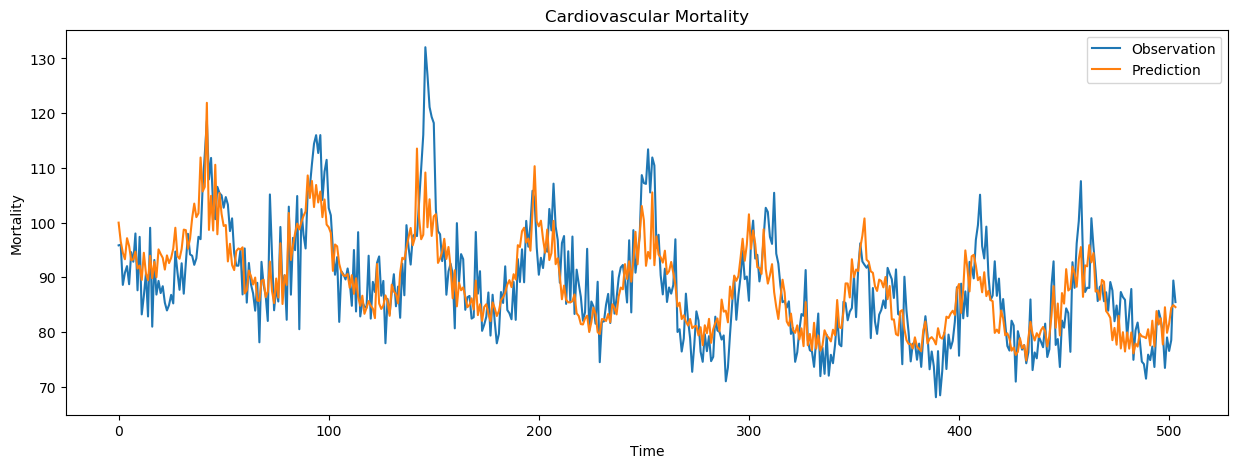

In [15]:
# Plot the data
figure(figsize=(15, 5))
plot(mort[5:end], label="Observation")
plot(StatsBase.predict(lm_model), label="Prediction")
xlabel("Time")
ylabel("Mortality")
legend()
title("Cardiovascular Mortality")
show()

* Question (b)

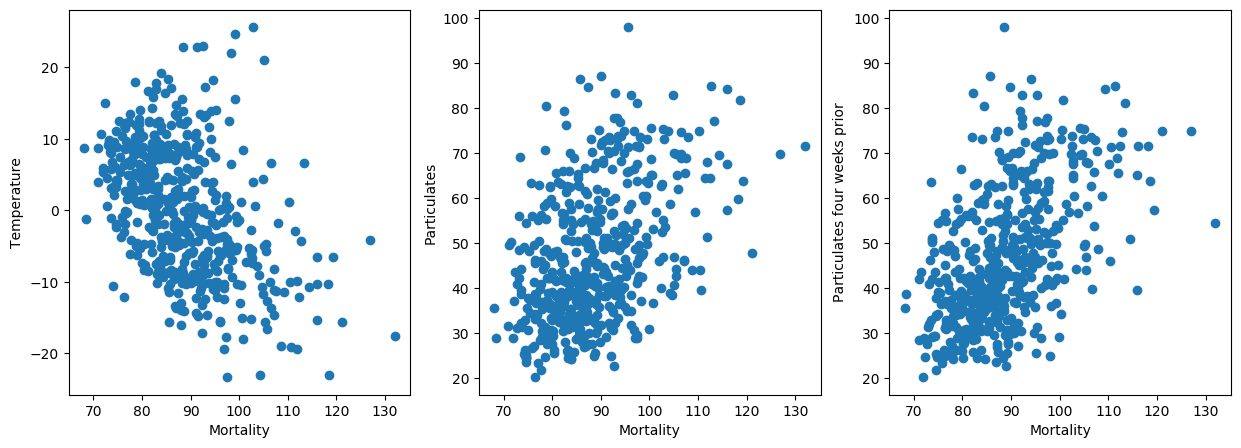

In [20]:
fig = figure(figsize=(15, 5))
subplot(131)
p1 = scatter(mort[5:end], temp1)
xlabel("Mortality")
ylabel("Temperature")

subplot(132)
p2 = scatter(mort[5:end], part1)
xlabel("Mortality")
ylabel("Particulates")

subplot(133)
p3 = scatter(mort[5:end], part4)
xlabel("Mortality")
ylabel("Particulates four weeks prior")

show()

In [22]:
# Correlation between M_t and P_t
cor(mort[5:end], part1)

0.44228958011390346

In [23]:
# Correlation between M_t and P_{t-4}
cor(mort[5:end], part4)

0.5209993034593486

$M_t$ and $P_{t-4}$ have a higher correlation than $M_t$ and $P_t$. So, using $P_{t-4}$ instead of $P_t$ in the linear model should results to better fit.

## Exercise 2.3

* Question (a) - Random walk

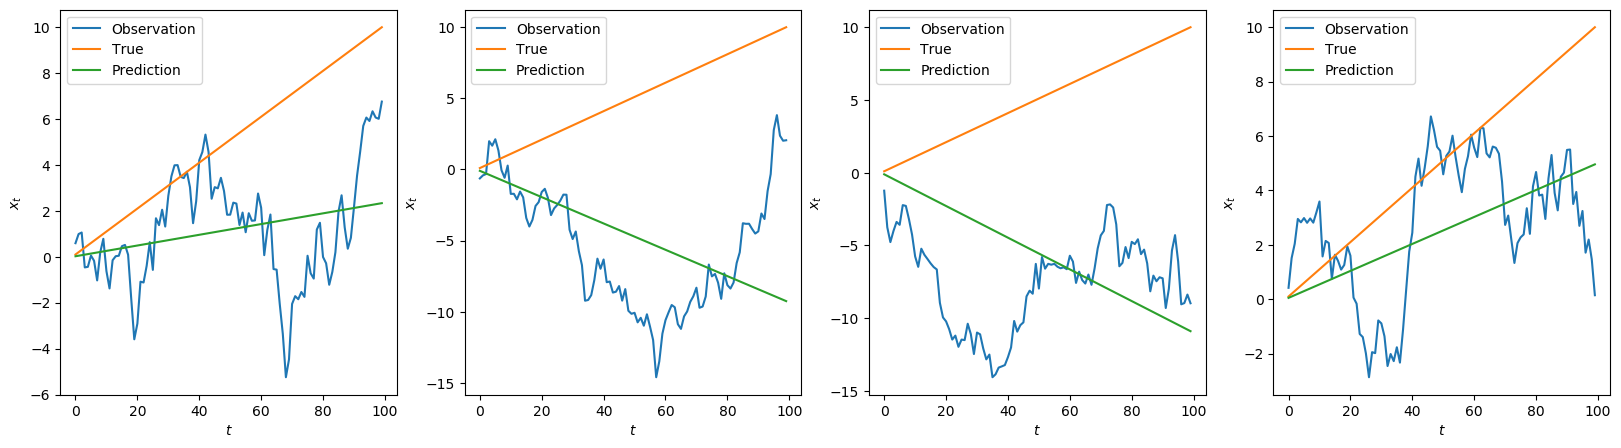

In [28]:
fig = figure(figsize=(20, 5))
for i in 1:4
    X = cumsum(rand(Normal(0.01, 1), 100))
    T = 1:100
    data = DataFrame(X=X, T=T)
    lm_model = lm(@formula(X ~ 0 + T), data);
    
    subplot(1, 4, i)
    plot(X, label="Observation")
    plot([0.1*t for t in T], label="True")
    plot(StatsBase.predict(lm_model), label="Prediction")
    xlabel(L"$t$")
    ylabel(L"$x_t$")
    legend()
end
show()

* Question (b) - Linear trend plus noise

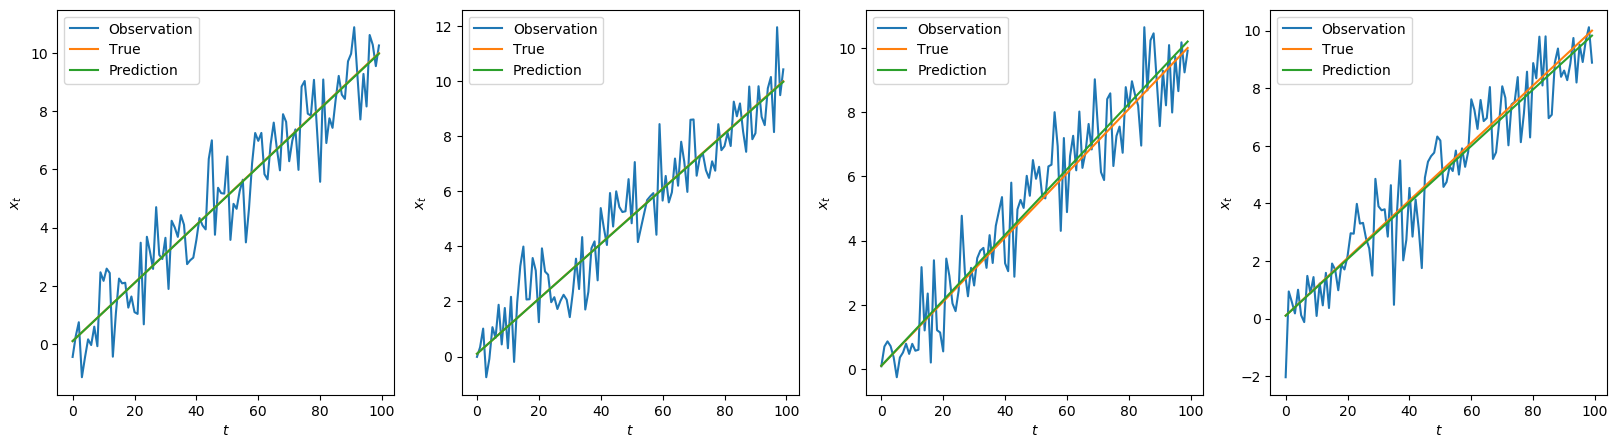

In [19]:
fig = figure(figsize=(20, 5))
for i in 1:4
    T = 1:100
    X = 0.1 * T + rand(Normal(), 100)
    data = DataFrame(X=X, T=T)
    lm_model = lm(@formula(X ~ 0 + T), data);
    
    subplot(1, 4, i)
    plot(X, label="Observation")
    plot([0.1*t for t in T], label="True")
    plot(StatsBase.predict(lm_model), label="Prediction")
    xlabel(L"$t$")
    ylabel(L"$x_t$")
    legend()
end
show()

* Question (c)

The assignement shows that we should be very careful in case of correlated errors (see random walks). The estimated mean function is thus bad estimated, and without multiple realizations of the process (functional data), the mean is hardly estimated. For non-correlated errors (linear trend), all is well, and the predicted mean curve lies close to the true one. Linear models assume non-correlated errors.

## Exercise 2.4

Let $y = (y_1, \dots, y_n)$, $Z \in \mathbb{R}^{n \times k}$ and $\beta = \mathbb{R}^k$.
Consider the Gaussian regression model:
$$y = Z\beta + w, \quad\text{where}~ w \sim \mathcal{N}(0, \sigma^2\mathbb{1}_n).$$

Thus, we have $y \sim \mathcal{N}(Z\beta, \sigma^2\mathbb{1}_n)$ and so, $f(y; \beta, \sigma^2\mathbb{1}_n) = (2\pi)^{-n/2}\text{det}(\sigma^2\mathbb{1}_n)^{-1/2}\exp\left(-\frac{1}{2}(y - Z\beta)^\top \sigma^{-2}\mathbb{1}_n(y - Z\beta)\right)$.

The Kullback-Leibler Information for discriminating between two densities in the same family is given by:

\begin{align}
I(\beta_1, \sigma_1; \beta_2, \sigma_2) &= \frac{1}{n}\mathbb{E}_1\left(\log(f(y; \beta_1, \sigma_1) - \log(f(y; \beta_2, \sigma_2)\right) \\
&= \frac{1}{2n}\mathbb{E}_1\left(- \log\text{det}(\sigma_1^2\mathbb{1}_n) - (y - Z\beta_1)^\top\sigma_1^{-2}\mathbb{1}_n(y - Z\beta_1) + \log\text{det}(\sigma_2^2\mathbb{1}_n) + (y - Z\beta_2)^\top\sigma_2^{-2}\mathbb{1}_n(y - Z\beta_2)\right) \\
&= \frac{1}{2n}\log\left(\frac{\text{det}(\sigma_2^2\mathbb{1}_n)}{\text{det}(\sigma_1^2\mathbb{1}_n)}\right) + \frac{1}{2n}\mathbb{E}_1\left((y - Z\beta_2)^\top\sigma_2^{-2}\mathbb{1}_n(y - Z\beta_2) - (y - Z\beta_1)^\top\sigma_1^{-2}\mathbb{1}_n(y - Z\beta_1)\right) \\
&= \frac{1}{2}\log\left(\frac{\sigma_2^2}{\sigma_1^2}\right) + \frac{1}{2n}\mathbb{E}_1\left(\text{tr}(\sigma_2^{-2}(y - Z\beta_2)(y - Z\beta_2)^\top) - \text{tr}(\sigma_1^{-2}(y - Z\beta_1)(y - Z\beta_1)^\top)\right) \\
&= \frac{1}{2}\log\left(\frac{\sigma_2^2}{\sigma_1^2}\right) + \frac{1}{2n}\mathbb{E}_1\left(\text{tr}(\sigma_2^{-2}(y - Z\beta_2)(y - Z\beta_2)^\top)\right) - \frac{1}{2n}\text{tr}(\sigma_1^{-2}\left(\mathbb{E}_1(y - Z\beta_1)(y - Z\beta_1)^\top)\right) \\
&= \frac{1}{2}\log\left(\frac{\sigma_2^2}{\sigma_1^2}\right) + \frac{1}{2n}\mathbb{E}_1\left(\text{tr}(\sigma_2^{-2}(y - Z\beta_2)(y - Z\beta_2)^\top)\right) - \frac{1}{2n}\text{tr}(\sigma_1^{-2}\sigma_1^2\mathbb{1}_n) \\
&= \frac{1}{2}\log\left(\frac{\sigma_2^2}{\sigma_1^2}\right) - \frac{1}{2} + \frac{\sigma_2^{-2}}{2n}\mathbb{E}_1\left(\text{tr}(yy^\top - 2y\beta_2^\top Z^\top + \beta_2^\top Z^\top Z\beta_2)\right) \\
&= \frac{1}{2}\log\left(\frac{\sigma_2^2}{\sigma_1^2}\right) - \frac{1}{2} + \frac{\sigma_2^{-2}}{2n}\left(\text{tr}(\sigma_1^{2}\mathbb{1}_n + \beta_1^\top Z^\top Z\beta_1 - 2Z\beta_1\beta_2^\top Z^\top + \beta_2^\top Z^\top Z\beta_2)\right) \\
&= \frac{1}{2}\log\left(\frac{\sigma_2^2}{\sigma_1^2}\right) - \frac{1}{2} + \frac{\sigma_1^{2}}{2\sigma_2^2} + \frac{1}{2}\frac{(\beta_1 - \beta_2)^\top Z^\top Z (\beta_1 - \beta_2)}{n\sigma_2^2} \\
&= \frac{1}{2}\left(\log\left(\frac{\sigma_2^2}{\sigma_1^2}\right) - 1 + \frac{\sigma_1^{2}}{\sigma_2^2} + \frac{(\beta_1 - \beta_2)^\top Z^\top Z (\beta_1 - \beta_2)}{n\sigma_2^2}\right)
\end{align}

## Exercise 2.5

Consider to find an unbiased estimator for $\mathbb{E}_1(I(\beta_1, \sigma_1^2; \widehat{\beta}, \widehat{\sigma}^2)).$

\begin{align}
\mathbb{E}_1(I(\beta_1, \sigma_1^2; \widehat{\beta}, \widehat{\sigma}^2)) &= \frac{1}{2}\left(\mathbb{E}_1\left(\frac{\sigma_1^2}{\widehat{\sigma}^2}\right) - \mathbb{E}_1\log\left(\frac{\sigma_1^2}{\widehat{\sigma}^2}\right) - 1 + \mathbb{E}_1\left(\frac{(\beta_1 - \widehat\beta)^\top Z\top Z (\beta_1 - \widehat\beta)}{n\widehat{\sigma}^2}\right)\right) \\
&= \frac{1}{2}\left(n\mathbb{E}_1\left(\frac{\sigma_1^2}{n\widehat{\sigma}^2}\right) - \log(\sigma_1^2) + \mathbb{E}_1(\log(\widehat\sigma^2)) - 1 + \mathbb{E}_1\left(\frac{\sigma_1^2}{\sigma_1^2}\frac{(\beta_1 - \widehat\beta)^\top Z\top Z (\beta_1 - \widehat\beta)}{n\widehat{\sigma}^2}\right)\right) \\
&= \frac{1}{2}\left(\frac{n}{n - k - 2} - \log(\sigma_1^2) + \mathbb{E}_1(\log(\widehat\sigma^2)) - 1 + \mathbb{E}_1\left(\frac{\sigma_1^2}{n\widehat\sigma^2}\right)\mathbb{E}_1\left(\frac{(\beta_1 - \widehat\beta)^\top Z\top Z (\beta_1 - \widehat\beta)}{\sigma_1^2}\right)\right) \\
&= \frac{1}{2}\left(- \log(\sigma_1^2) + \mathbb{E}_1(\log(\widehat\sigma^2)) + \frac{n - k}{n - k - 2} - 1\right) \\
\end{align}

## Exercise 2.6

Consider a process consisting of a linear trend with an additive noise term consisting of independent random variables $w_t$ with zero means and variances $\sigma_w^2$, that is
$$x_t = \beta_0 + \beta_1t + w_t,$$
where $\beta_0, \beta_1$ are fixed constants.

* *Question (a)*

The process $x_t$ is nonstationary because its mean value function is $\mu_t = \beta_0 + \beta_1 t$ and thus depend on $t$.

* *Question (b)*

Consider the first difference series $\nabla x_t = x_t - x_{t - 1}$. Clearly, its mean value function does not depend on time $t$ (equal to $\beta_1$). 
The autocovariance is:
\begin{align}
\gamma(s, t) &= Cov(\nabla x_s, \nabla x_t) \\
             &= Cov(\beta_1 + w_s - w_{s-1}, \beta_1 + w_t - w_{t-1}) \\
             &= Cov(w_s, w_t) - Cov(w_s, w_{t-1}) - Cov(w_{s-1}, w_t) + Cov(w_{s-1}, w_{t-1}) \\
             &= \left\{
                    \begin{array}{r c l}
                        2\sigma_w^2 &if& s - t = 0\\
                        -\sigma_w^2 &if& \vert s - t \vert = 1\\
                    \end{array}
               \right.,
\end{align}
and thus depends on $s$ and $t$  only through their difference $\lvert s - t \rvert$. And, so the process is stationary.

* *Question (c)*

We replace $w_t$ by a general stationary process $y_t$, with mean $\mu_y$ and autocovariance function $\gamma_y(h)$. Clearly, the mean value of the process $\nabla x_t$ is still $\beta_1$ and does not depend on time $t$. The autocovariance is $\gamma(h) = 2\gamma_y(h) - \gamma_y(h + 1) - \gamma_y(h - 1)$. It depends only on $h$, so this process is also stationary.

## Exercise 2.7

We consider the process $\nabla x_t = \delta + w_t + y_t - y_{t-1}$ where $w_t \sim \mathcal{N}(0, \sigma^2)$. Noting that $(w_t)_t$ and $(y_t - y_{t-1})_t$ are independant, and using the previous exercise, $\nabla x_t$ is a stationary process. 

## Exercise 2.8

In [2]:
# Load data
varve = load("../data/varve.rda")["varve"];
log_varve = [log(x) for x in varve];

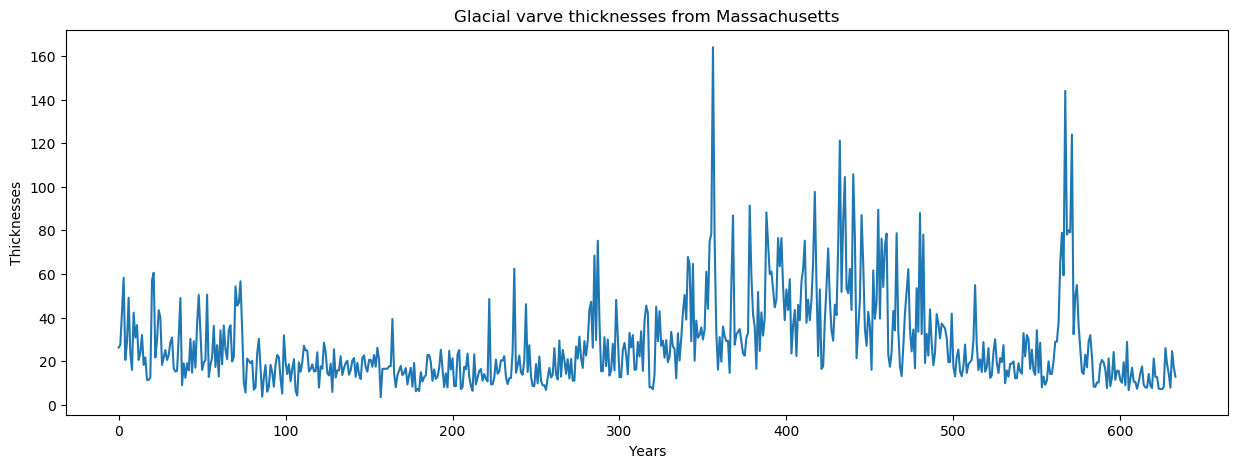

In [25]:
# Plot the data
figure(figsize=(15, 5))
plot(varve)
xlabel("Years")
ylabel("Thicknesses")
title("Glacial varve thicknesses from Massachusetts")
show()

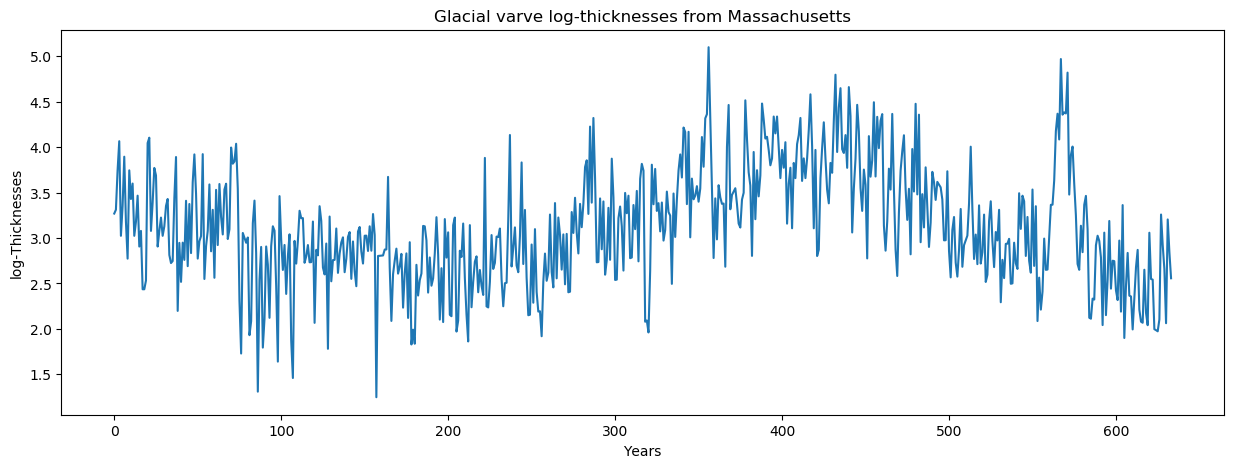

In [26]:
# Plot the log data
figure(figsize=(15, 5))
plot(log_varve)
xlabel("Years")
ylabel("log-Thicknesses")
title("Glacial varve log-thicknesses from Massachusetts")
show()

* *Question (a)*

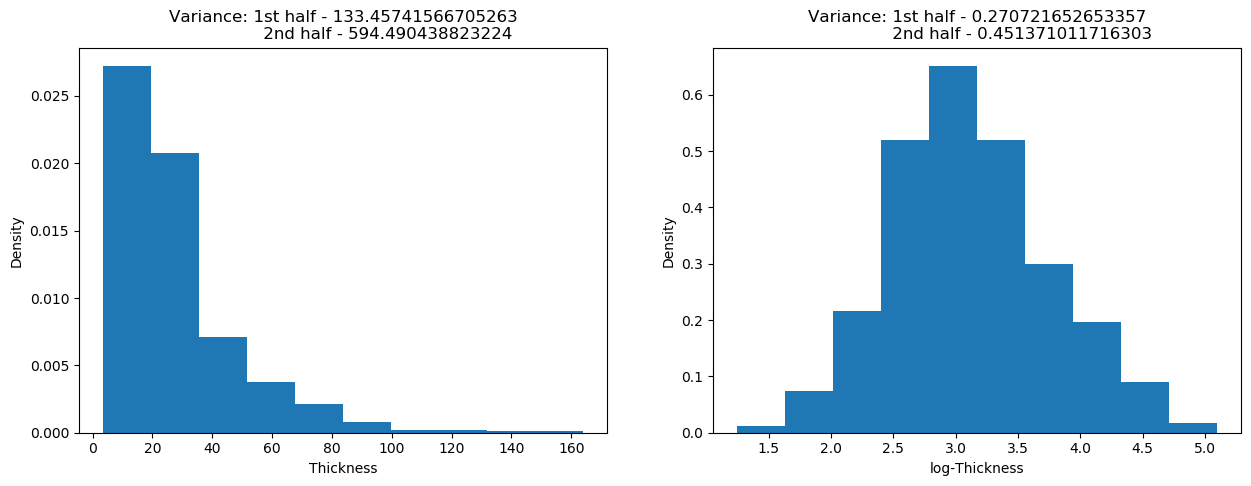

In [46]:
fig = figure(figsize=(15, 5))
subplot(121)
p1 = hist(varve, density=true)
xlabel("Thickness")
ylabel("Density")
title("Variance: 1st half - $(var(varve[1:317]))
                 2nd half - $(var(varve[318:634]))")

subplot(122)
p2 = hist(log_varve, density=true)
xlabel("log-Thickness")
ylabel("Density")
title("Variance: 1st half - $(var(log_varve[1:317]))
                 2nd half - $(var(log_varve[318:634]))")
show()

We see that the serie exhibits heteroscedasticity thanks to the computation of the variance. The log-transformation stabilized a bit the variance within the data. Morover, the normality assumption is more reflected in the log-data.

* *Question (b)*

Regarding the plot of the series $y_t$, it seems that the series decrease for the first $200$ years, then increase for $250$ years, and finally decrease until the end.

* *Question (c)*

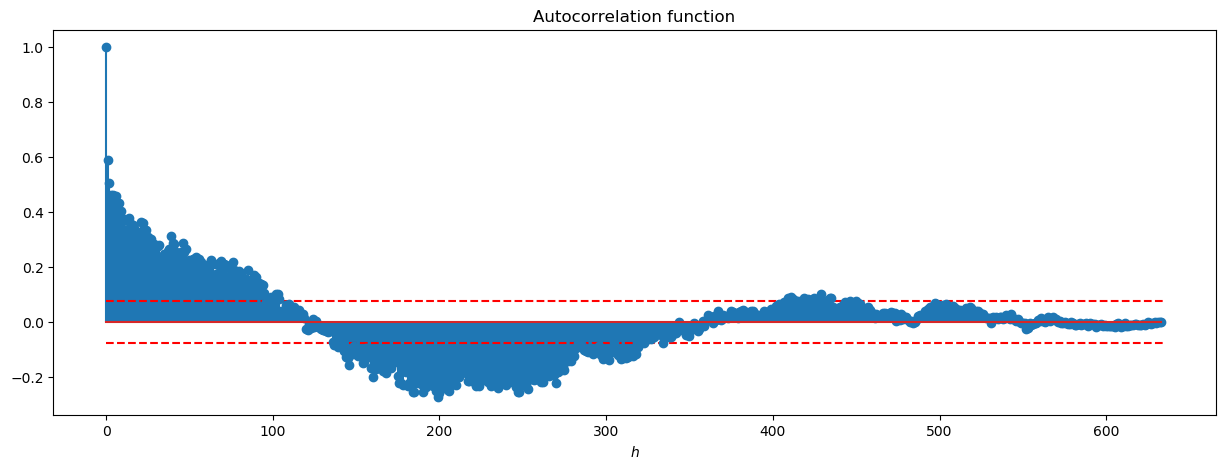

In [38]:
# Plot the ACF
figure(figsize=(15, 5))
stem(0:633, autocor(log_varve, 0:633), use_line_collection=true)
hlines([1.96 / sqrt(634), -1.96 / sqrt(634)], xmin=0, xmax=634, colors="red", linestyles="dashed")
xlabel(L"$h$")
title("Autocorrelation function")
show()

The autocorrelation is still quite important until $h = 500$. Note that between $h = 100$ and $h = 350$, $y_t$ and $y_{t + h}$ are negatively correlated. The autocorrelation does not really belong to the $95\%$ CI (red dashd lines), and there is clearly not an exponential decay of the ACF. So, the series is not stationary.

* *Question (d)*

In [21]:
u = log_varve[2:end] - log_varve[1:end - 1];

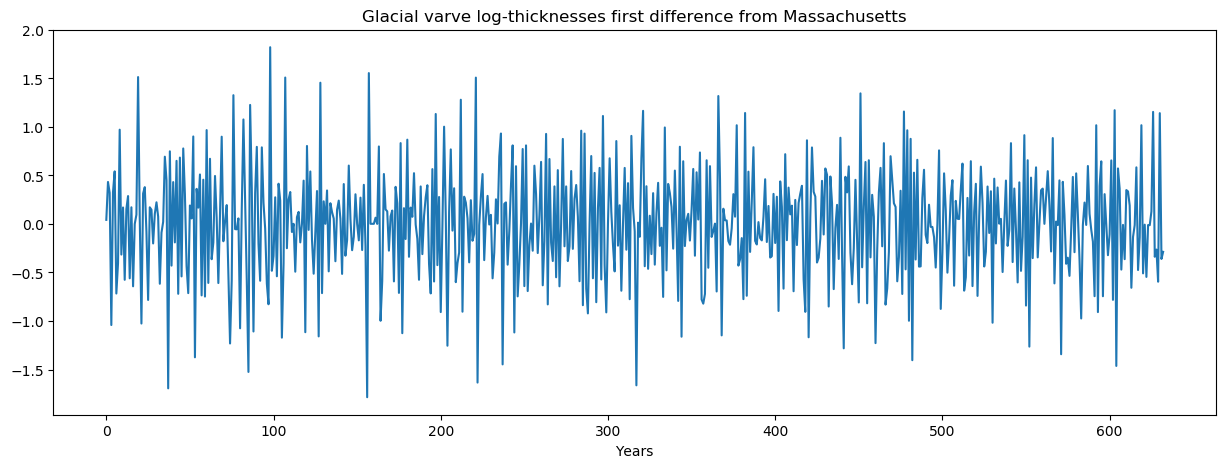

In [23]:
# Plot the log data
figure(figsize=(15, 5))
plot(u)
xlabel("Years")
title("Glacial varve log-thicknesses first difference from Massachusetts")
show()

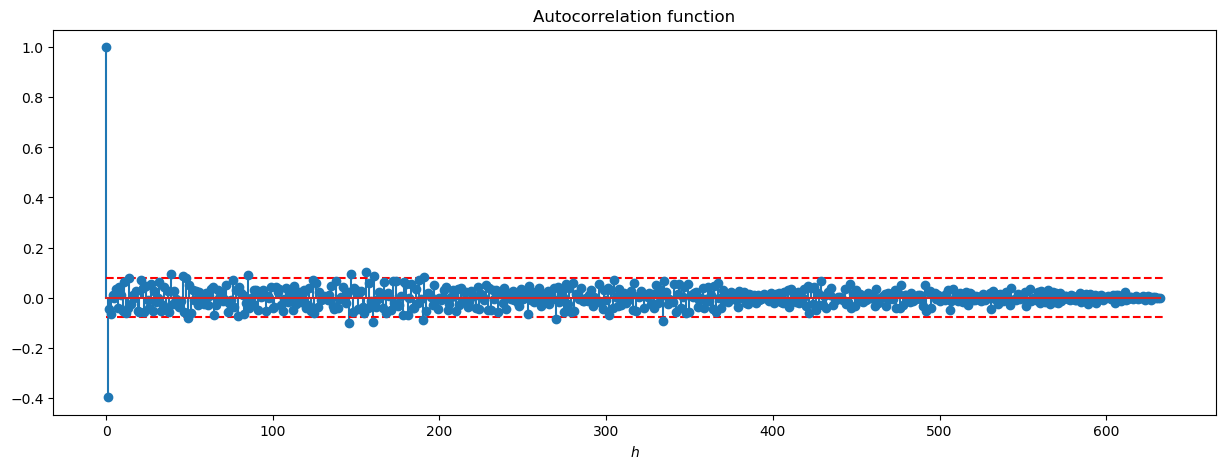

In [39]:
# Plot the ACF
figure(figsize=(15, 5))
stem(0:632, autocor(u, 0:632), use_line_collection=true)
hlines([1.96 / sqrt(634), -1.96 / sqrt(634)], xmin=0, xmax=634, colors="red", linestyles="dashed")
xlabel(L"$h$")
title("Autocorrelation function")
show()

The autocovariance function decrease rapidly the $95\%$ CI (red dashed lines). This series is a reasonably stationary series. It is an estimation of $x_t - x_{t-1} / x_{t-1}$ when this quantity is small. This can be usefull for the analysis of the return. 

* *Question (e)*

The series $u_t$ is assumed to be stationary. So, its mean function does not depend on time. Moreover, it has been build by differentiate two series. So, its seems reasonable to assume the following expansion for $u_t$:
$$u_t = \mu + w_t + \theta w_{t-1}.$$
This is a direct generalisation of the example $1.26$ with $w_t$ a continuous random variable.
We assume that the $w_t$ are independent with mean $0$ and variance $\sigma_w^2$.

\begin{align}
\gamma(s, t) &= Cov(u_s, u_t) \\
             &= Cov(\mu + w_s + \theta w_{s-1}, \mu + w_t + \theta w_{t-1}) \\
             &= Cov(w_s, w_t) +\theta Cov(w_s, w_{t-1})+\theta Cov(w_{s-1}, w_t)+\theta^2 Cov(w_{s-1}, w_{t-1}) \\
             &= \left\{
                    \begin{array}{r c l}
                        (1 + \theta^2)\sigma_w^2 &if& s - t = 0\\
                        \theta \sigma_w^2 &if& \vert s - t \vert = 1\\
                        0 &if& \vert s - t \vert > 1
                    \end{array}
               \right.
\end{align}

* *Question (f)*

Considering $\rho_u(1)$ and $\gamma_u(0)$, we found out that
$$\theta^2 \rho_u(1) - \theta + \rho_u(1) = 0.$$
Thus, resolving the second order polynmials, we have
$$\theta = \frac{1 \pm \sqrt{1 - 4\rho_u(1)}}{2\rho_u(1)}.$$
Finally, by replacing this expression within $\gamma_u(0)$, we have an expression for $\sigma_w^2$
$$\sigma_w^2 = \left(1 + \frac{1 \pm \sqrt{1 - 4\rho_u(1)}}{2\rho_u^2(1)} - \frac{1}{\rho_u(1)}\right)^{-1}\gamma_u(0).$$

## Exercise 2.9

In [2]:
# Load data
SOI = load("../data/soi.rda")["soi"];

* *Question (a)*

In [3]:
# Build the model matrix
time = LinRange(1, 453, 453);
data = DataFrame(S=SOI, T=time);

In [4]:
# Linear model
lm_model = lm(@formula(S ~ 0 + T), data);

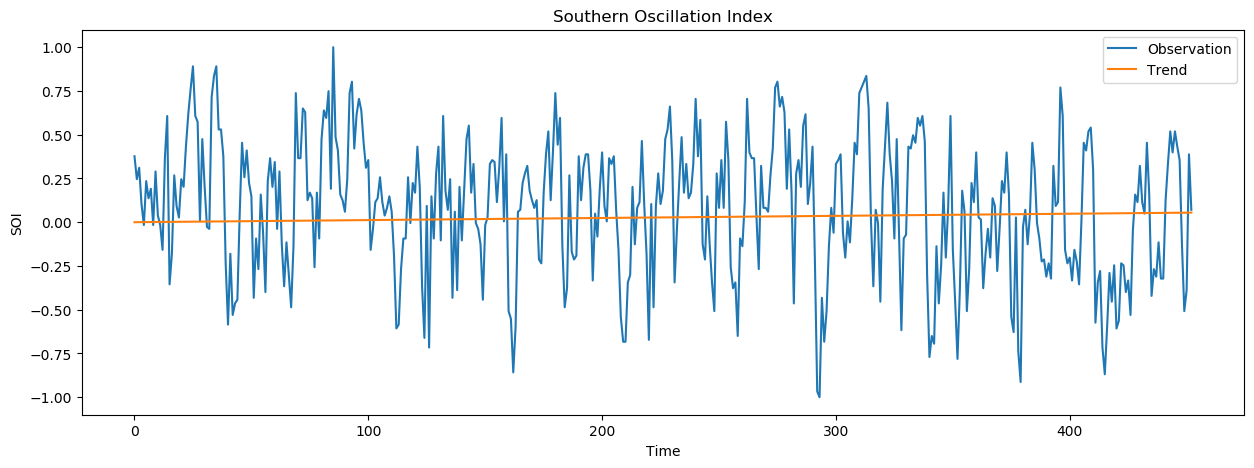

In [5]:
# Plot the data
figure(figsize=(15, 5))
plot(SOI, label="Observation")
plot(StatsBase.predict(lm_model), label="Trend")
xlabel("Time")
ylabel("SOI")
legend()
title("Southern Oscillation Index")
show()

It does not appear a significant trend in the sea surface temperature in the data.

In [6]:
SOI_detrended = SOI - StatsBase.predict(lm_model);

* *Question (b)*

In [27]:
p = periodogram(SOI_detrended, fs=1);

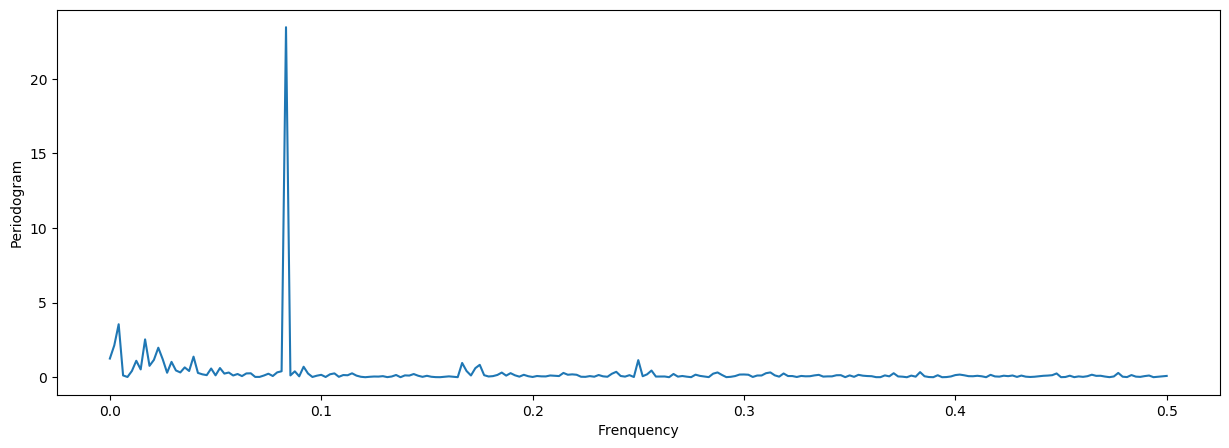

In [30]:
figure(figsize=(15, 5))
plot(p.freq, p.power)
xlabel("Frenquency")
ylabel("Periodogram")
show()

In [52]:
big_perio = sortperm(p.power, rev=true);

In [63]:
# Three most important frequency
[1 / x for x in p.freq[big_perio][1:3]]

3-element Array{Float64,1}:
  12.0
 240.0
  60.0

So, the most important peak correspond to one cycle every $12$, $240$ and $60$ months. The cycle every $60$ months (five years) reflect the El Nino effect. The one that appears every $240$ months ($20$ years) may reflect a particularly important and intense El Nino effect.

## Exercise 2.10

In [2]:
# Load data
gas = load("../data/gas.rda")["gas"];
oil = load("../data/oil.rda")["oil"];

* *Question (a)*

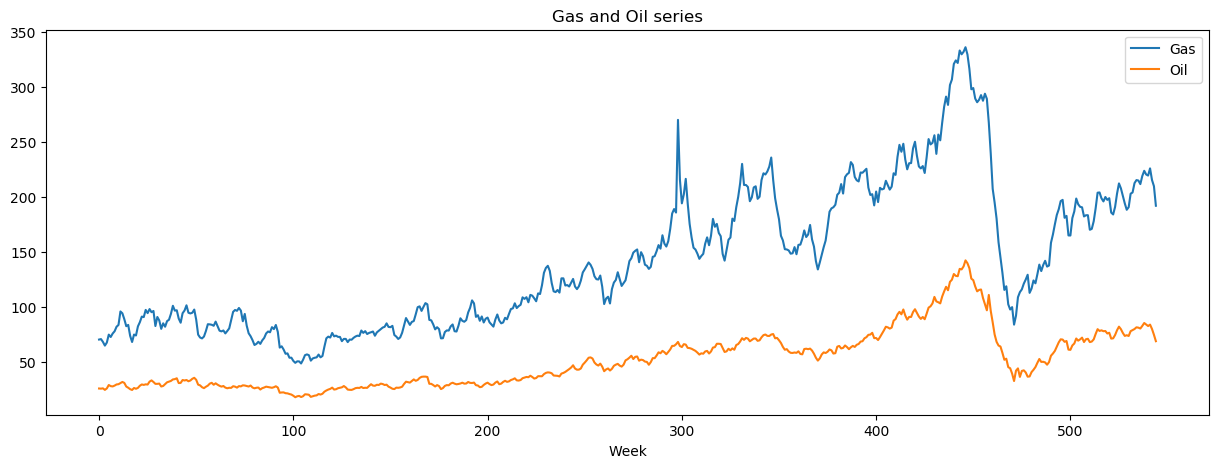

In [3]:
# Plot the data
figure(figsize=(15, 5))
plot(gas, label="Gas")
plot(oil, label="Oil")
xlabel("Week")
legend()
title("Gas and Oil series")
show()

These series resemble the most to random walks with linear trends. The series are probably not stationary, because their mean functions depend on time.

* *Question (b)*

The transformation $y_t = \nabla \log x_t$ is an approximation of the return $\nabla x_t / x_t$ when $x_t$ is small. The computation with the log is probably more stable.

* *Question (c)*

In [4]:
gas_log = [log(x) for x in gas];
oil_log = [log(x) for x in oil];
gas_r = gas_log[2:end] - gas_log[1:end - 1];
oil_r = oil_log[2:end] - oil_log[1:end - 1];

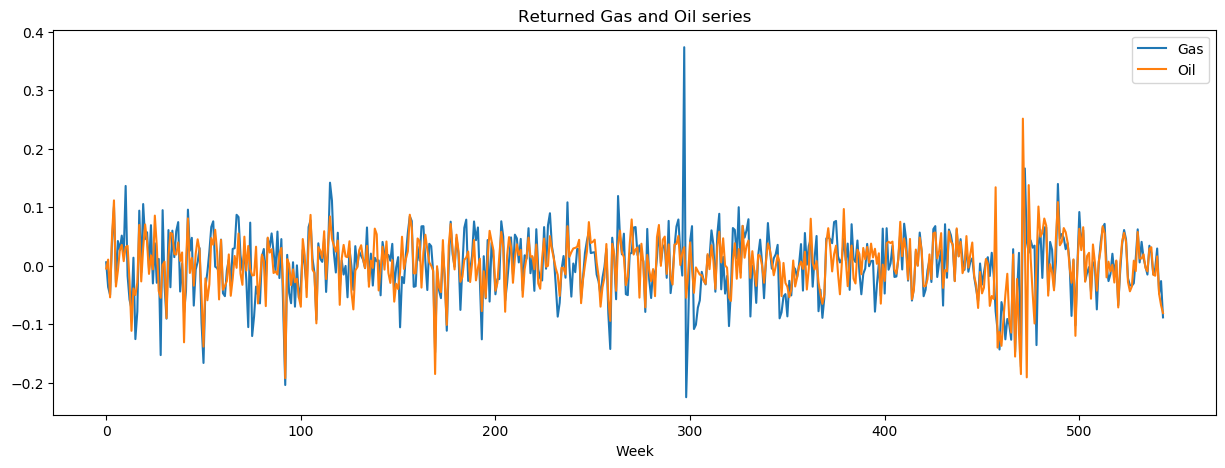

In [5]:
# Plot the data
figure(figsize=(15, 5))
plot(gas_r, label="Gas")
plot(oil_r, label="Oil")
xlabel("Week")
legend()
title("Returned Gas and Oil series")
show()

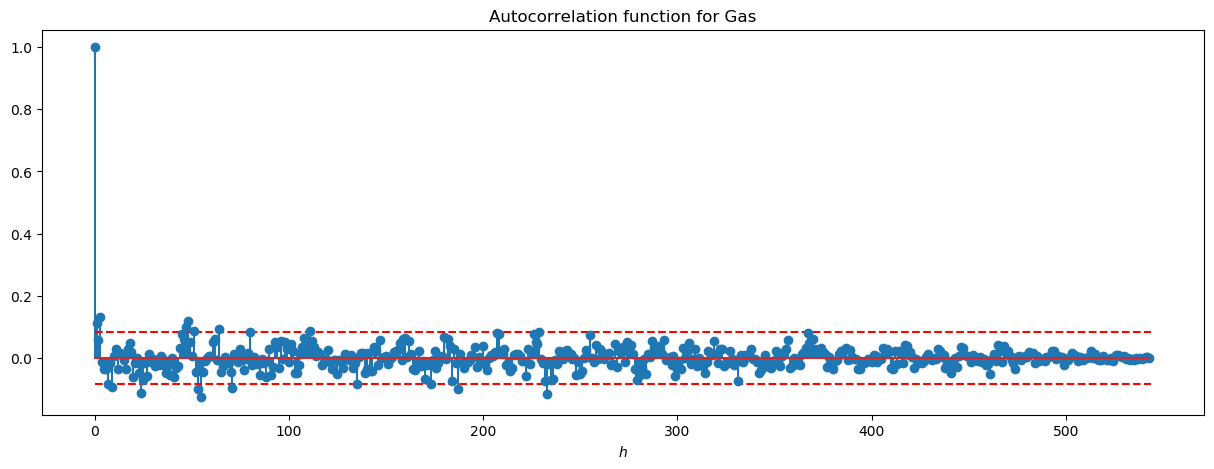

In [6]:
# Plot the ACF for gas return
figure(figsize=(15, 5))
stem(0:543, autocor(gas_r, 0:543), use_line_collection=true)
hlines([1.96 / sqrt(544), -1.96 / sqrt(544)], xmin=0, xmax=544, colors="red", linestyles="dashed")
xlabel(L"$h$")
title("Autocorrelation function for Gas")
show()

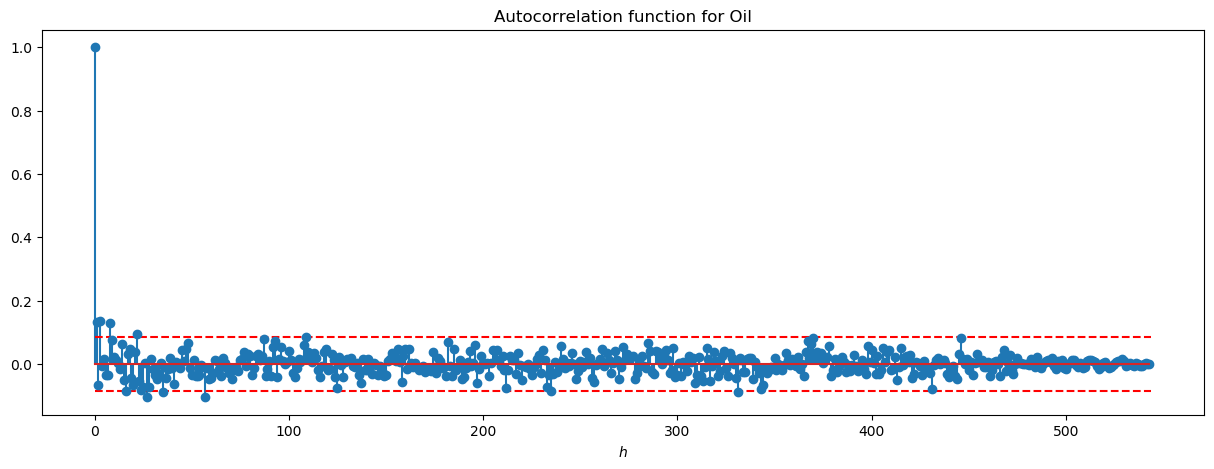

In [7]:
# Plot the ACF for oil return
figure(figsize=(15, 5))
stem(0:543, autocor(oil_r, 0:543), use_line_collection=true)
hlines([1.96 / sqrt(544), -1.96 / sqrt(544)], xmin=0, xmax=544, colors="red", linestyles="dashed")
xlabel(L"$h$")
title("Autocorrelation function for Oil")
show()

The transformation of the data make the series stationary. The correlation between the Gas and Oil series is likely to be high.

* *Question (d)*

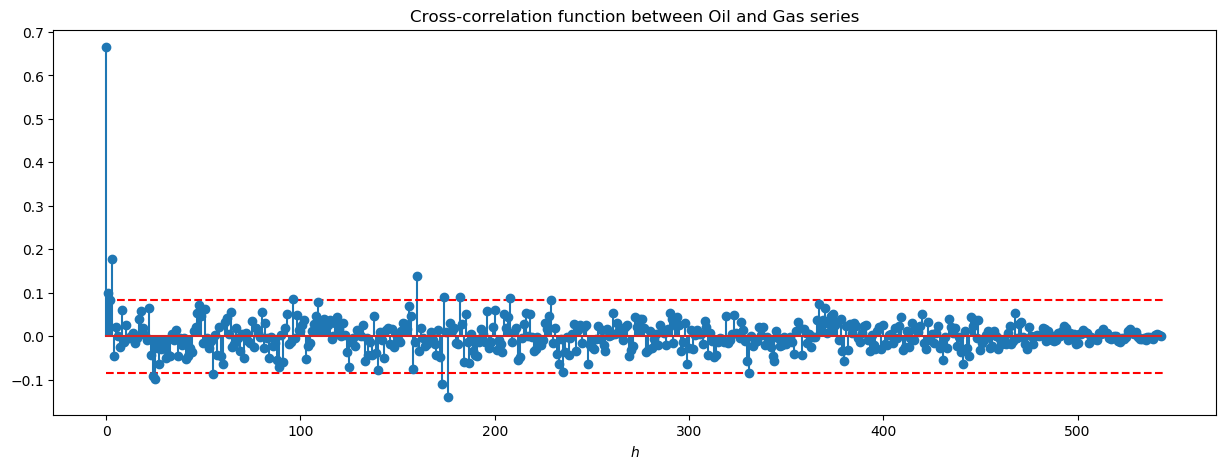

In [8]:
# Plot the CCF for oil return
figure(figsize=(15, 5))
stem(0:543, crosscor(gas_r, oil_r, 0:543), use_line_collection=true)
hlines([1.96 / sqrt(544), -1.96 / sqrt(544)], xmin=0, xmax=544, colors="red", linestyles="dashed")
xlabel(L"$h$")
title("Cross-correlation function between Oil and Gas series")
show()

The correlation when $h = 0$ is high (around $0.7$) and indicate the influence between the two series. Moreover, the small correlation values when gas leads oil is significant.

* *Question (e)*

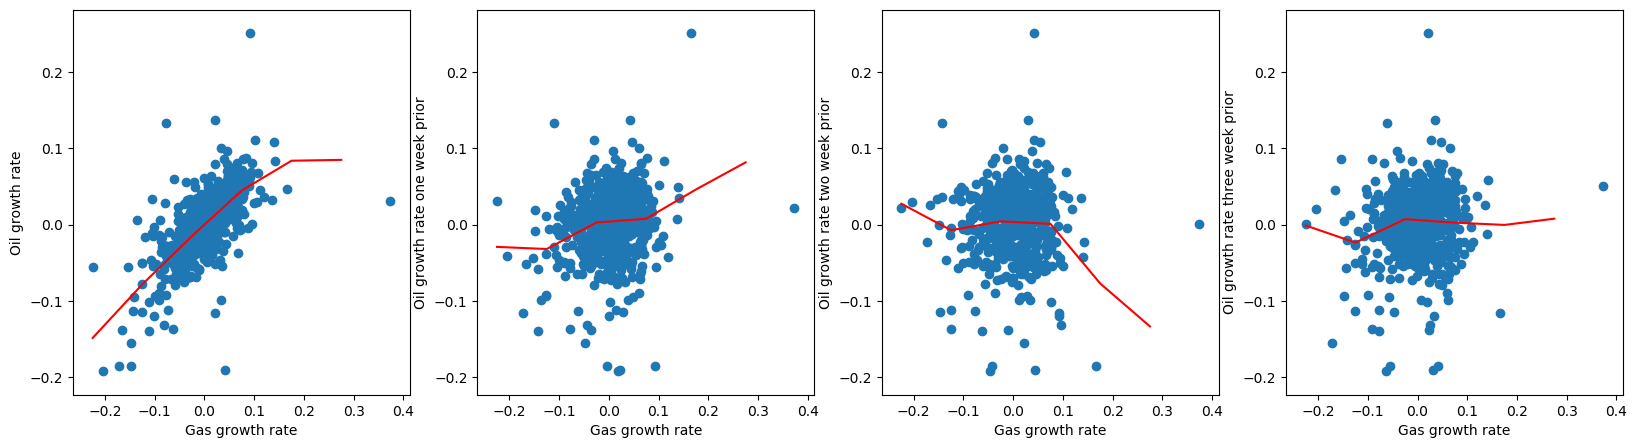

In [9]:
x_pred = range(extrema(gas_r)...; step = 0.1)

fig = figure(figsize=(20, 5))
subplot(141)
p1 = scatter(gas_r[1:end], oil_r[1:end])
model = loess(gas_r[1:end], oil_r[1:end])
plot(x_pred, Loess.predict(model, x_pred), c="r")
xlabel("Gas growth rate")
ylabel("Oil growth rate")

subplot(142)
p2 = scatter(gas_r[2:end], oil_r[1:end - 1])
model = loess(gas_r[2:end], oil_r[1:end - 1])
plot(x_pred, Loess.predict(model, x_pred), c="r")
xlabel("Gas growth rate")
ylabel("Oil growth rate one week prior")

subplot(143)
p3 = scatter(gas_r[3:end], oil_r[1:end - 2])
model = loess(gas_r[3:end], oil_r[1:end - 2])
plot(x_pred, Loess.predict(model, x_pred), c="r")
xlabel("Gas growth rate")
ylabel("Oil growth rate two week prior")

subplot(144)
p4 = scatter(gas_r[4:end], oil_r[1:end - 3])
model = loess(gas_r[4:end], oil_r[1:end - 3])
plot(x_pred, Loess.predict(model, x_pred), c="r")
xlabel("Gas growth rate")
ylabel("Oil growth rate three week prior")

show()

We have fit the data using the lowess method, related to nearest neighbor regression. We can see few outliers in the data. Only the first model exhibit almost linear relationship.

* *Question (f)*

Consider the model
$$G_t = \alpha_1 + \alpha_2 I_t + \beta_1 O_t + \beta_2 O_{t-1} + w_t,$$
where $I_t = 1$ if $O_t \geq 0$ and $0$ otherwise. $I_t$ is the indicator of no growth or positive growth in oil price.

In [10]:
I = [x > 0 for x in oil_r]
data = DataFrame(G=gas_r[2:end], I=I[2:end], O=oil_r[2:end], O_lag=oil_r[1:end-1]);

In [11]:
# Linear model
lm_model = lm(@formula(G ~ I + O + O_lag), data);

In [12]:
lm_model

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

G ~ 1 + I + O + O_lag

Coefficients:
────────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error      t  Pr(>|t|)     Lower 95%    Upper 95%
────────────────────────────────────────────────────────────────────────────────
(Intercept)  -0.00610993  0.00345539  -1.77    0.0776  -0.0128976    0.000677756
I             0.0117854   0.00551434   2.14    0.0330   0.000953159  0.0226176
O             0.687749    0.0583795   11.78    <1e-27   0.57307      0.802429
O_lag         0.112152    0.0385698    2.91    0.0038   0.0363868    0.187918
────────────────────────────────────────────────────────────────────────────────

The fitted model when there is negative growth in oil price at time $t$ is
$$G_t = -0.006 + 0.68 O_t + 0.11 O_{t-1}.$$
The fitted model when there is no or positive growth in oil price at time $t$ is
$$G_t = 0.0057 + 0.68 O_t + 0.11 O_{t-1}.$$

Thus, the model is (almost) symetric considering the indicator of growth in oil price. The asymmetry assumption does not seem to hold here. 

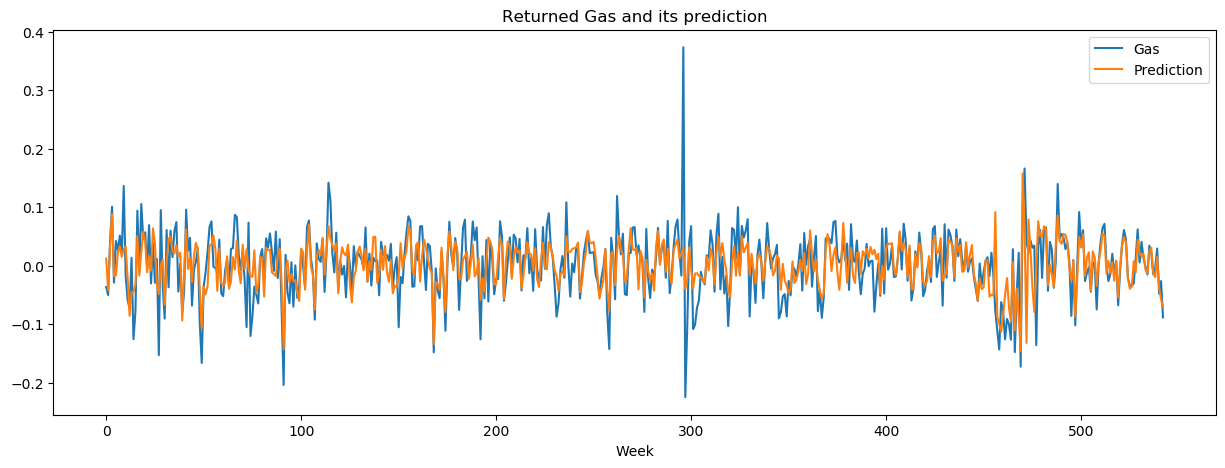

In [24]:
figure(figsize=(15, 5))
plot(gas_r[2:end], label="Gas")
plot(StatsBase.predict(lm_model), label="Prediction")
xlabel("Week")
legend()
title("Returned Gas and its prediction")
show()

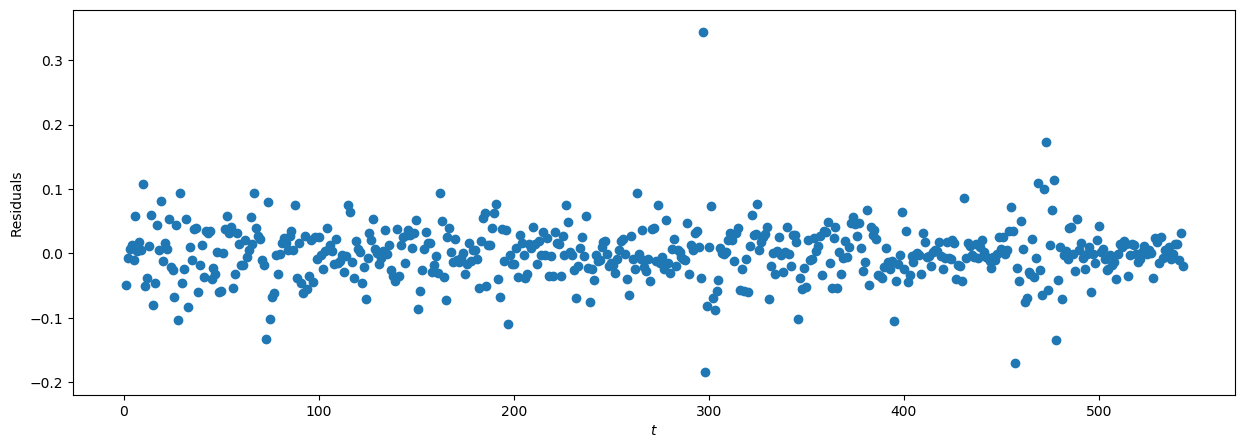

In [25]:
resid = gas_r[2:end] - StatsBase.predict(lm_model)

fig = figure(figsize=(15, 5))
scatter(1:543, resid)
xlabel(L"$t$")
ylabel("Residuals")
show()

The residuals appear to be normal, and look the original series. Don't know how to analyze that.

## Exercise 2.11

In [28]:
# Load data
globtemp = load("../data/globtemp.rda")["globtemp"];

In [42]:
function filter_convolution(x, filter, sides)
    nx = length(x)
    nf = length(filter)
    
    nshift = (sides == 1) ? 0 : div(nf, 2)
    
    out = Array{Float64}(undef, nx)
    for i in 1:nx
        z = 0
        if (i + nshift - nf < 0) || (i + nshift > nx)
            out[i] = NaN
            continue
        end
        for j in (max(1, i + nshift - nx)):(min(nf, i + nshift - 1))
            tmp = x[i + nshift - j]
            z += filter[j] * tmp
        end
        out[i] = z
    end
    return out
end

filter_convolution (generic function with 1 method)

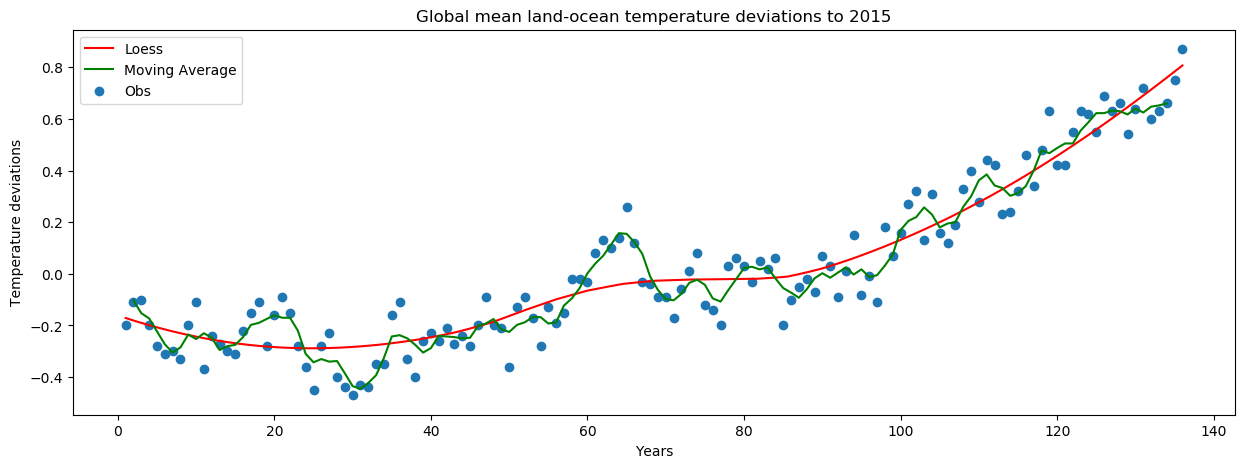

In [44]:
x_pred = range(extrema(1:136)...; step = 0.1)
model = loess(1:136, globtemp)

fig = figure(figsize=(15, 5))
p1 = scatter(1:136, globtemp, label = "Obs")
plot(x_pred, Loess.predict(model, x_pred), c="r", label = "Loess")
plot(1:136, filter_convolution(globtemp, [0.25, 0.25, 0.25, 0.25], 2), c="g", label="Moving Average")
xlabel("Years")
ylabel("Temperature deviations")
legend()
title("Global mean land-ocean temperature deviations to 2015")
show()

We see an increasing linear trend in the data. The two smoothing methods exhibit different results. The loess method results in a smoother estimation of the trend.